### Basic Ordonary Least Squares Regression with Lists

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [1,4,9,16,25,36,49,64,81,100,121,144]

In [3]:
xprime = sm.add_constant(x) 

In [4]:
model = sm.OLS(y,xprime)
regression = model.fit()

In [5]:
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     181.1
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           9.88e-08
Time:                        16:58:13   Log-Likelihood:                -45.296
No. Observations:                  12   AIC:                             94.59
Df Residuals:                      10   BIC:                             95.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.3333      7.110     -4.266      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
regression.params

array([-30.33333333,  13.        ])

In [7]:
y_pred = regression.predict(xprime)

In [8]:
coef = regression.params[1]     
const = regression.params[0]
y_pred = model.predict(params=[const, coef], exog=xprime)

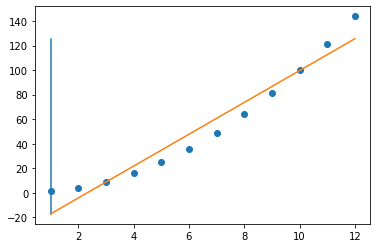

In [9]:
plt.scatter(x, y)
plt.plot(xprime, y_pred)
plt.show() 

In [10]:
#Predict with a new value z = 10
z = [1, 13] 
#zpred = regression.predict(z)
zpred = model.predict(params=[const, coef], exog=13)
print(int(zpred[1]))

169


### OLS Regression using Pandas

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [12]:
data = pd.read_csv('datasets/lr_data.csv')

x = data.iloc[:, 0].values 
y = data.iloc[:, 1].values 

xprime = sm.add_constant(x)
model = sm.OLS(y,xprime)
regression = model.fit()

In [13]:
y_pred = regression.predict(xprime)

In [14]:
coef = regression.params[1]     
const = regression.params[0]
y_pred = model.predict(params=[const, coef], exog=xprime)

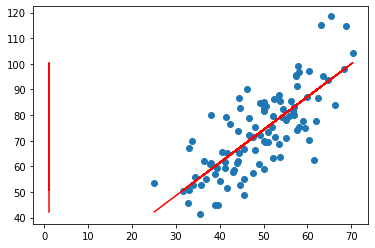

In [15]:
plt.scatter(x,y)
plt.plot(xprime, y_pred, color='red')
plt.show()

### OLS on Images

In [16]:
import os, cv2
import numpy as np
import random, shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [17]:
data = []
labels = []
path1 = "datasets/dogs-vs-cats/cats/"
random.shuffle(os.listdir(path1))
for imagepaths in tqdm(os.listdir(path1)[:200]):
    imagepath = path1 + imagepaths
    image = cv2.imread(imagepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(64,64)).flatten()
    data.append(image)
    labels.append(0) 

path2 = "datasets/dogs-vs-cats/dogs/"
random.shuffle(os.listdir(path2))
for imagepaths in tqdm(os.listdir(path2)[:200]):
    imagepath = path2 + imagepaths
    image = cv2.imread(imagepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(64,64)).flatten()
    data.append(image)
    labels.append(1) 

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 664.45it/s]


In [18]:
print(f"No. of Cat Images : {sum(labels)}")
print(f"No. of Dog Images : {len(labels) - sum(labels)}")

No. of Cat Images : 200
No. of Dog Images : 200


In [19]:
xprime = sm.add_constant(data)
model = sm.OLS(labels,xprime)
regression = model.fit()
#print(regression.summary())
x_pred = np.linspace(1, 400, 4096)
x_pred = x_pred.reshape(1,4096,1)

y_pred = regression.predict(xprime)
coef = regression.params[1:]
const = regression.params[0]

y_pred = model.predict(params=[coef], exog=x_pred)[0]

Text(0.5, 1.0, 'Cat')

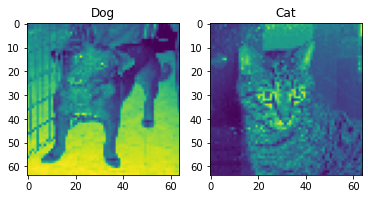

In [20]:
import matplotlib.pyplot as plt


image1 = cv2.imread("datasets/dogs-vs-cats/dogs/dog.1.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image1 = cv2.resize(image1,(64,64)).flatten()
image11 = np.expand_dims(image1, axis=0)
image11 = np.array(image11)
xprime1 = sm.add_constant(image11, has_constant='add')
xprime1 = xprime1.reshape(1,4097,1)
y_pred1 = model.predict(params=[coef], exog=xprime1)[0]
z1 = np.argmax(y_pred1)*pow(10,-7)
label1 = 'Cat'
if z1 > 0.4:
    label1 = 'Dog'
    
image2 = cv2.imread("datasets/dogs-vs-cats/cats/cat.1.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image2 = cv2.resize(image2,(64,64)).flatten()
image21 = np.expand_dims(image2, axis=0)
image21 = np.array(image21)
xprime1 = sm.add_constant(image21, has_constant='add')
xprime1 = xprime1.reshape(1,4097,1)
y_pred2 = model.predict(params=[coef], exog=xprime1)[0]
z2 = np.argmax(y_pred2)*pow(10,-7)
label2 = 'Cat'
if z2 > 0.4:
    label2 = 'Dog'

image1 = image1.reshape(64,64)
image2 = image2.reshape(64,64)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(image1)
ax.set_title(label1)

ax = fig.add_subplot(1, 2, 2)
plt.imshow(image2)
ax.set_title(label2)

### OLS for NLP

In [21]:
import os,re
import numpy as np
from tqdm import tqdm
import pandas as pd
import statsmodels.api as sm

In [22]:
df = pd.read_excel("datasets/movie_review.xlsx")
df.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",negative
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",negative
2,Why does this movie fall WELL below standards?...,negative
3,Wow and I thought that any Steven Segal movie ...,negative
4,"The story is seen before, but that does'n matt...",negative


In [23]:
X = df["Reviews"][:1200]
y = df["Sentiment"][:1200]

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
print(f"No. of Positive Reviews : {sum(y)}")
print(f"No. of Negative Reviews : {len(y) - sum(y)}")

No. of Positive Reviews : 611
No. of Negative Reviews : 589


In [26]:
data_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

<ipython-input-26-5e91e33c57df>:4: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(1200, 16707)

In [28]:
xprime = sm.add_constant(X)
model = sm.OLS(y,xprime)
regression = model.fit()

In [29]:
x_pred = np.linspace(1, 1200, 16707)
x_pred = x_pred.reshape(1,16707,1)

y_pred = regression.predict(xprime)
coef = regression.params

y_pred = model.predict(params=[coef], exog=x_pred)[0]

In [30]:
def text_pred(text):
    text = cv.transform([text]).toarray()
    xprime = sm.add_constant(text)
    xprime = xprime.reshape(1,16707,1)
    preds = model.predict(params=[coef], exog=xprime)[0]
    z2 = np.argmax(preds)*pow(10,-8)
    label = 'Negative'
    if z2 > 0.5:
        label = 'Positive'
    return label

In [31]:
text_pred("This movie sucks and the plot twist was already known")

'Negative'

In [32]:
text_pred("Wow, It is an excellent movie i never saw till date")

'Positive'